# BrainFrames

## Introduction

The goal of this project is to produce a dope set of videos for visualizing
the hodgkins-huxley model (this implementation can be found here: [\[Khare\]](https://github.com/sbkhare/HodgkinHuxley)) as a network graph.

(This is a growing list so far: description of hodgkins_huxley, smallworld, more to come, need their descriptions added may include their own seperate visuals later)

## Code

### Packages

In [44]:
import networkx as nx #For network specific operations
import numpy as np #utillity for accessing data
import hodgkin_huxley #Sikander's Implementation
from hodgkin_huxley import network as hhn

### Initialization
Here we create a huxley-hodgkins object. This first creates a network of 25 nodes and 
a 200 iteration count. The object *hh* is then initialized with the default parameters
provided by networkx for small world graph generation. Finally the model is run for the 
pre-specified iteration count.

The output is some traditional network statistics, a visualization of the generic graph
structure as a circle graph, and a heat mapped adjacency matrix.

Average shortest path length: 2.3983333333333334
Average clustering coefficient: 0.2851526254160533


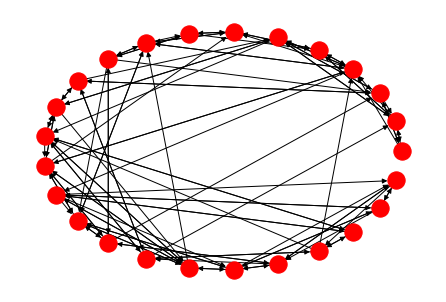

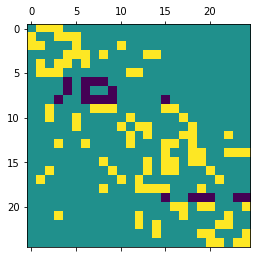

In [45]:
hh = hhn.HodgkinHuxley(25,200)
hh.initialize()
hh.simulate()

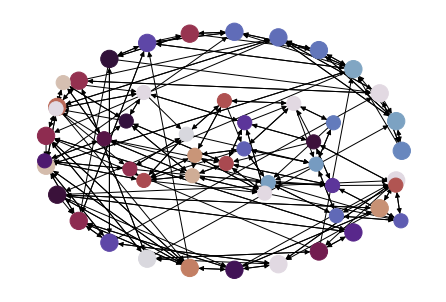

In [49]:
def colored_circle(network, nc = "red", ncmax = None, ncmin = None):
    nx.draw_circular(network, node_color = nc, vmin = ncmin, vmax = ncmax, cmap = "twilight")

#Might be fun to mess with springing constants as a function of network data
def colored_spring(network, nc = "red", ncmax = None, ncmin = None):
    pos = nx.spring_layout(network, iterations=200)
    nx.draw(network, pos, node_color=nc, node_size=200, cmap=plt.cm.twilight)


ncmax = np.amax(hh.voltage)
ncmin = np.amin(hh.voltage)
colored_circle(hh.network, hh.voltage[:,0],ncmax = ncmax, ncmin=ncmin)
colored_spring(hh.network, hh.voltage[:,0],ncmax = ncmax, ncmin=ncmin)

In [ ]:
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

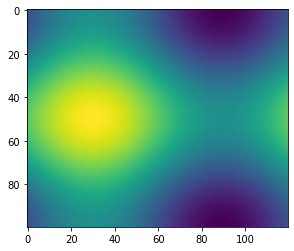

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('dynamic_images.mp4')

plt.show()


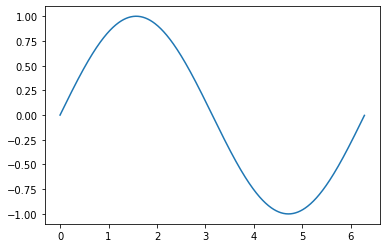

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))

plt.show()


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(np.sin(x + i / 100))  # update the data.
    return line,

#ani = animation.FuncAnimation(
#    fig, animate, init_func=init, interval=2, blit=True, save_count=50)

# To save the animation, use e.g.
#
#ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)
